# Birds Classifier  

In [2]:
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
import torch

torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

Using device: cuda:0


In [5]:
with open('api_microsoft.txt') as f:
    mykey = f.read()

In [6]:
key = os.environ.get('AZURE_SEARCH_KEY', mykey)

In [7]:
bird_types = 'American Goldfinch','House Finch','Common Redpoll'
path = Path('birds')

In [26]:
if not path.exists():
    path.mkdir()
    for o in bird_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [27]:
fns = get_image_files(path)
fns

(#433) [Path('birds/Common Redpoll/1b250dad-02fb-4f50-8be8-bc7bf7783b90.jpeg'),Path('birds/Common Redpoll/5e93c77f-94e1-4ab4-91df-ab48f27783a5.jpg'),Path('birds/Common Redpoll/442ea08a-aa44-46db-8e40-b10926096041.jpg'),Path('birds/Common Redpoll/7700aaac-d40c-4a84-8078-3daeb19b47fe.jpg'),Path('birds/Common Redpoll/7ef8ab2d-315a-40d4-ac42-fae7558a65cf.jpg'),Path('birds/Common Redpoll/47fe95de-98a0-4a7e-b618-cef08693df6e.jpg'),Path('birds/Common Redpoll/37a8fe1a-798c-4221-993e-23bacd50f685.jpg'),Path('birds/Common Redpoll/58084e25-4034-4512-b1cb-1e01cca9e0df.jpg'),Path('birds/Common Redpoll/45048df5-2b16-48dc-ab5e-21cb11e920a8.JPG'),Path('birds/Common Redpoll/dc6fa580-6d62-46ca-8739-51dc7e78b254.jpg')...]

In [28]:
failed = verify_images(fns)
failed

(#0) []

In [29]:
failed.map(Path.unlink);

In [30]:
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [31]:
dls = birds.dataloaders(path)

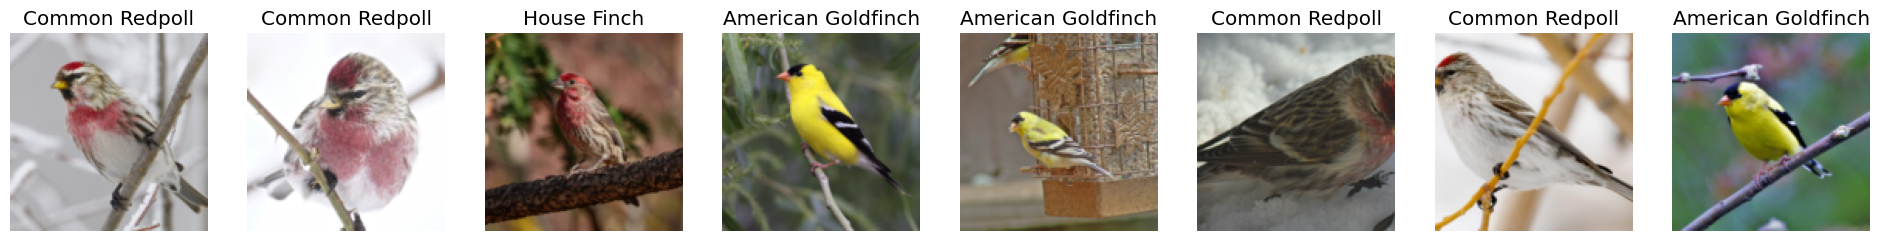

In [32]:
dls.valid.show_batch(max_n=8, nrows=1)

In [33]:
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = birds.dataloaders(path)

In [34]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.753686,0.635686,0.244186,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.446156,0.330436,0.151163,00:05
1,0.317654,0.132944,0.058140,00:05
2,0.267517,0.104856,0.034884,00:05


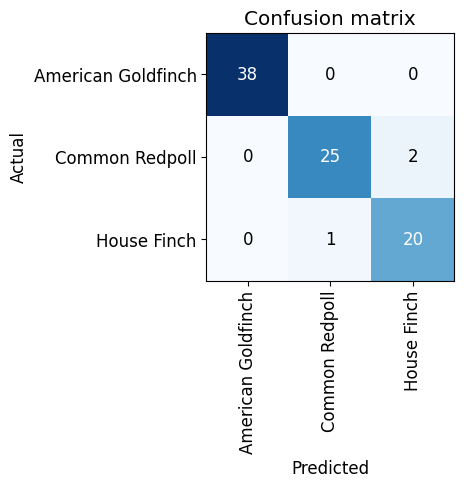

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


Prediction | Actual | Loss | Probability (=Confidence)



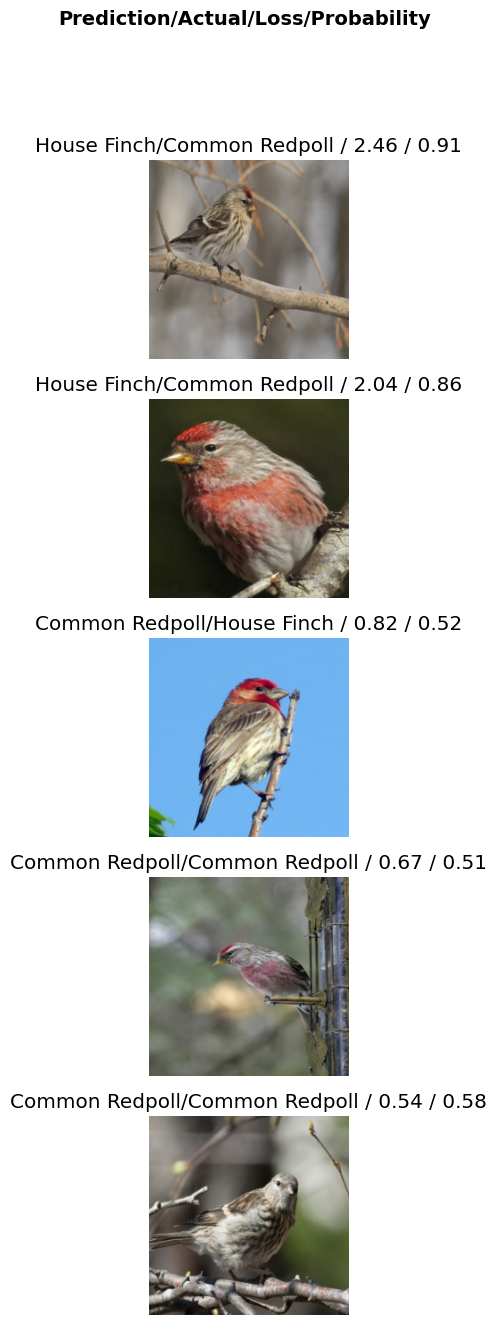

In [36]:
print('\nPrediction | Actual | Loss | Probability (=Confidence)\n')
interp.plot_top_losses(5, nrows=5)

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [44]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [45]:
learn.export(fname='export_birds.pkl')

In [47]:
learn_inf = load_learner('export_birds.pkl')

In [48]:
learn_inf.dls.vocab

['American Goldfinch', 'Common Redpoll', 'House Finch']

In [ ]:
learn_inf.predict('images/black bear.jpeg')

In [20]:
import torch
print("PyTorch Verison: ",torch.__version__)
print("Is available: ", torch.cuda.is_available())
print("Current Device: ", torch.cuda.current_device())
print("Pytorch CUDA Compiled version: ", torch._C._cuda_getCompiledVersion())
print("Pytorch version: ", torch.version)
print("pytorch file: ", torch.__file__)
print("Number of GPUs: ",torch.cuda.device_count())

PyTorch Verison:  2.0.0+cu118
Is available:  True
Current Device:  0
Pytorch CUDA Compiled version:  11080
Pytorch version:  <module 'torch.version' from '/home/oliver/anaconda3/envs/test/lib/python3.9/site-packages/torch/version.py'>
pytorch file:  /home/oliver/anaconda3/envs/test/lib/python3.9/site-packages/torch/__init__.py
Number of GPUs:  1
